In [16]:
# Para que funciones, todos nuestros scripts debemos exportar las siguientes variables de entorno
%env AWS_ACCESS_KEY_ID=minio   
%env AWS_SECRET_ACCESS_KEY=minio123 
%env MLFLOW_S3_ENDPOINT_URL=http://localhost:9000

env: AWS_ACCESS_KEY_ID=minio
env: AWS_SECRET_ACCESS_KEY=minio123
env: MLFLOW_S3_ENDPOINT_URL=http://localhost:9000


In [17]:
!echo $AWS_ACCESS_KEY_ID
!echo $AWS_SECRET_ACCESS_KEY
!echo $MLFLOW_S3_ENDPOINT_URL

$AWS_ACCESS_KEY_ID
$AWS_SECRET_ACCESS_KEY
$MLFLOW_S3_ENDPOINT_URL


In [18]:
import mlflow
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestRegressor
import requests
import json
import sklearn
import matplotlib
from sklearn import datasets
from sklearn.datasets import fetch_openml
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score

mlflow.set_tracking_uri('http://localhost:5000') 

# set the experiment id
experiment_name = "mnist_784"
mlflow.set_experiment(experiment_name)

mlflow.autolog()

mnist = fetch_openml('mnist_784', as_frame = False)

X_mnist_array = pd.DataFrame(mnist.data, columns=mnist.feature_names).to_numpy()
y_mnist_array = pd.DataFrame(mnist.target, columns=['label']).to_numpy()

X_digits=X_mnist_array
y_digits=y_mnist_array

X_train, X_test, y_train, y_test = train_test_split(X_digits,
                                                  y_digits,
                                                  test_size=0.3,
                                                  random_state=32)

tree_clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 10)
tree_clf.fit(X_train, y_train)
y_pred = tree_clf.predict(X_test)
print(' ')
print(f"accuracy_score: {accuracy_score(y_test, y_pred)}")
print(f"recall_score: {metrics.recall_score(y_test, y_pred, average = 'macro')}")
print(f"f1_score: {metrics.f1_score(y_test, y_pred, average = 'macro')}")

2024/04/24 08:27:46 INFO mlflow.tracking.fluent: Experiment with name 'mnist_784' does not exist. Creating a new experiment.
2024/04/24 08:27:47 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2024/04/24 08:27:47 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2024/04/24 08:27:47 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.
c:\python38\lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(
2024/04/24 08:28:03 INFO mlflow.utils.autologging_utils: Created MLflow

 
accuracy_score: 0.8663809523809524
recall_score: 0.8646828009757137
f1_score: 0.8646724557801964


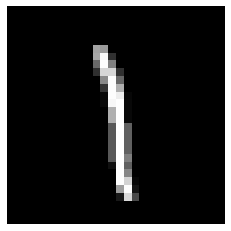

In [19]:
k = np.random.randint(X_test.shape[0])

plt.axis('off')
plt.imshow(X_test[k].reshape(28,28), cmap = 'gray')

In [20]:
URL = 'http://localhost:8800/'

headers = {'Content-type': 'application/json','accept': 'application/json'}

response = requests.get(URL, headers=headers)

response.text

'{"message":"Welcome to the TP AdM II Carlos Rodriguez"}'

In [21]:
URL = 'http://localhost:8800/print_image/'

headers = {'Content-type': 'application/json','accept': 'application/json'}

payload = {"img": 
    X_test[k].astype(int).tolist()
  }

response = requests.get(URL, data=json.dumps(payload), headers=headers)

response.text

'[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,163,154,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,168,249,49,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,106,253,129,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,47,214,214,49,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,138,253,103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,54,253,175,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,253,238,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,247,254,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,175,254,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,175,254,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,88,255,96,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,88,254,96,0,0,0,0,0,0,0,

In [22]:
URL = 'http://localhost:8800/predict_image/'

headers = {'Content-type': 'application/json','accept': 'application/json'}

payload = {"img": 
    X_test[k].astype(int).tolist()
  }

response = requests.post(URL, data=json.dumps(payload), headers=headers)

response.text

'Internal Server Error'

In [23]:
URL = 'http://localhost:8800/predict/'

headers = {'Content-type': 'application/json','accept': 'application/json'}

payload = {"img": 
    X_test[k].astype(int).tolist()
  }

response = requests.post(URL, headers=headers)

response.text

'{"detail":[{"type":"missing","loc":["body","input_img_array"],"msg":"Field required","input":null}]}'

In [29]:
URL = 'http://localhost:8800/print_image/'

headers = {'Content-type': 'application/json','accept': 'application/json'}

payload = {"img": 
    X_test[k].astype(int).tolist()
  }

response = requests.get(URL, data=json.dumps(payload), headers=headers)

response.text

'[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,163,154,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,168,249,49,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,106,253,129,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,47,214,214,49,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,138,253,103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,54,253,175,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,253,238,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,247,254,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,175,254,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,175,254,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,88,255,96,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,88,254,96,0,0,0,0,0,0,0,

In [30]:
URL = 'http://localhost:8800/predict_image/'

headers = {'Content-type': 'application/json','accept': 'application/json'}

payload = {"img": 
    X_test[k].astype(int).tolist()
  }

response = requests.post(URL, data=json.dumps(payload), headers=headers)

response.text

'Internal Server Error'

: 